# NYT Bestsellers – Exploratory Analysis

This notebook performs exploratory data analysis (EDA) on a historical dataset of New York Times Hardcover Fiction bestsellers.

**Dataset**
- Source: NYT Books API
- Granularity: Weekly snapshots
- Time span: ~26 weeks
- Rows: One row per book per week

The goal is to understand dataset structure, coverage, and data quality.


In [10]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")

Load data.

In [11]:
DATA_PATH = "../data/processed/history/nyt_history_weekly.csv"

df = pd.read_csv(
    DATA_PATH,
    parse_dates=["published_date", "bestsellers_date"]
)

df.head()

,published_date,bestsellers_date,list_name,title,author,primary_isbn13,publisher,rank,rank_last_week,weeks_on_list,amazon_product_url,book_image,description
0,2025-07-13,2025-06-28,Hardcover Fiction,DON'T LET HIM IN,Lisa Jewell,9781668033876,Atria,1,0,1,https://www.amazon.com/dp/1668033879?tag=thene...,https://static01.nyt.com/bestsellers/images/97...,A man with dark secrets in his past may cause ...
1,2025-07-13,2025-06-28,Hardcover Fiction,ATMOSPHERE,Taylor Jenkins Reid,9780593158715,Ballantine,2,1,4,https://www.amazon.com/dp/0593158717?tag=thene...,https://static01.nyt.com/bestsellers/images/97...,"In the summer of 1980, Joan Goodwin begins tra..."
2,2025-07-13,2025-06-28,Hardcover Fiction,A MOTHER'S LOVE,Danielle Steel,9780593498736,Delacorte,3,0,1,https://www.amazon.com/dp/0593498739?tag=thene...,https://static01.nyt.com/bestsellers/images/97...,After her handbag is stolen during a trip to P...
3,2025-07-13,2025-06-28,Hardcover Fiction,NEVER FLINCH,Stephen King,9781668089330,Scribner,4,3,5,https://www.amazon.com/dp/1668089335?tag=thene...,https://static01.nyt.com/bestsellers/images/97...,Holly Gibney does double duty by helping head ...
4,2025-07-13,2025-06-28,Hardcover Fiction,BURY OUR BONES IN THE MIDNIGHT SOIL,V.E. Schwab,9781250320520,Tor,5,2,3,https://www.amazon.com/dp/1250320526?tag=thene...,https://static01.nyt.com/bestsellers/images/97...,Stories set in Santo Domingo de la Calzada in ...


In [12]:
print("Shape:", df.shape)
df.info()

Shape: (405, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405 entries, 0 to 404
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   published_date      405 non-null    datetime64[ns]
 1   bestsellers_date    405 non-null    datetime64[ns]
 2   list_name           405 non-null    object        
 3   title               405 non-null    object        
 4   author              405 non-null    object        
 5   primary_isbn13      405 non-null    int64         
 6   publisher           405 non-null    object        
 7   rank                405 non-null    int64         
 8   rank_last_week      405 non-null    int64         
 9   weeks_on_list       405 non-null    int64         
 10  amazon_product_url  405 non-null    object        
 11  book_image          405 non-null    object        
 12  description         405 non-null    object        
dtypes: datetime64[ns](2), int64(4), o

Change datatype of primary_isbn13 

In [20]:
df["primary_isbn13"] = df["primary_isbn13"].astype(str)

ISBNs are identifiers rather than numeric quantities, so they are stored as strings to avoid loss of leading zeros and unintended numeric behavior.


Column by cplumn understanding

In [13]:
df.describe(include="all").T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
published_date,405,NaN,NaN,NaN,2025-10-12 06:13:20,2025-07-13 00:00:00,2025-08-24 00:00:00,2025-10-12 00:00:00,2025-11-30 00:00:00,2026-01-18 00:00:00,NaN
bestsellers_date,405,NaN,NaN,NaN,2025-09-27 06:13:19.999999744,2025-06-28 00:00:00,2025-08-09 00:00:00,2025-09-27 00:00:00,2025-11-15 00:00:00,2026-01-03 00:00:00,NaN
list_name,405,1,Hardcover Fiction,405,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,405,137,ONYX STORM,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
author,405,123,Rebecca Yarros,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
primary_isbn13,405.0,NaN,NaN,NaN,9781653576822.648438,9780008759827.0,9780593158715.0,9781250333988.0,9781649374189.0,9798889661115.0,3358126690.81086
publisher,405,60,Red Tower,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rank,405.0,NaN,NaN,NaN,8.0,1.0,4.0,8.0,12.0,15.0,4.325838
rank_last_week,405.0,NaN,NaN,NaN,4.177778,0.0,0.0,3.0,8.0,15.0,4.54548
weeks_on_list,405.0,NaN,NaN,NaN,8.792593,1.0,1.0,4.0,10.0,98.0,14.326858


In [21]:
df["published_date"].min(), df["published_date"].max()

(Timestamp('2025-07-13 00:00:00'), Timestamp('2026-01-18 00:00:00'))

The dataset spans approximately 6 months of weekly bestseller lists, covering mid-2025 through early-2026.


In [5]:
df.groupby("published_date").size().describe()

count    27.0
mean     15.0
std       0.0
min      15.0
25%      15.0
50%      15.0
75%      15.0
max      15.0
dtype: float64

Coverage over time

In [15]:
df["published_date"].nunique()

27

In [16]:
df.groupby("published_date").size().sort_index()

published_date
2025-07-13    15
2025-07-20    15
2025-07-27    15
2025-08-03    15
2025-08-10    15
2025-08-17    15
2025-08-24    15
2025-08-31    15
2025-09-07    15
2025-09-14    15
2025-09-21    15
2025-09-28    15
2025-10-05    15
2025-10-12    15
2025-10-19    15
2025-10-26    15
2025-11-02    15
2025-11-09    15
2025-11-16    15
2025-11-23    15
2025-11-30    15
2025-12-07    15
2025-12-14    15
2025-12-21    15
2025-12-28    15
2026-01-04    15
2026-01-18    15
dtype: int64

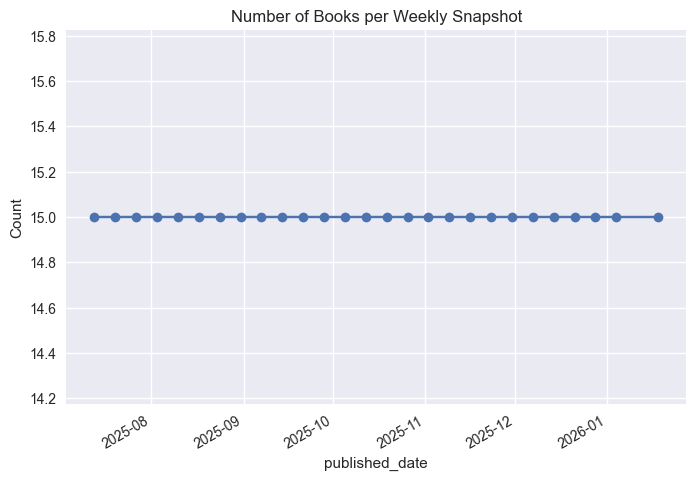

In [17]:
df.groupby("published_date").size().plot(
    kind="line",
    marker="o",
    title="Number of Books per Weekly Snapshot"
)
plt.ylabel("Count")
plt.show()

Confirms consistency of weekly snapshots and validates pipeline integrity.

Missing Data

In [18]:
(df.isna().mean() * 100).sort_values(ascending=False)

published_date        0.0
bestsellers_date      0.0
list_name             0.0
title                 0.0
author                0.0
primary_isbn13        0.0
publisher             0.0
rank                  0.0
rank_last_week        0.0
weeks_on_list         0.0
amazon_product_url    0.0
book_image            0.0
description           0.0
dtype: float64

No missing data.

In [19]:
print("Unique titles:", df["title"].nunique())
print("Unique authors:", df["author"].nunique())
print("Unique publishers:", df["publisher"].nunique())

Unique titles: 137
Unique authors: 123
Unique publishers: 60


### Key Observations

### Dataset Validation Summary

- The dataset contains 405 book-week observations across ~26 weekly snapshots.
- Each snapshot includes the full Hardcover Fiction ranking (1–15).
- No missing values were observed across key analytical fields.
- `weeks_on_list` ranges from 1 to 98 weeks, indicating a mix of new entrants and long-running bestsellers.

This dataset is well-structured for:
- Longitudinal rank analysis
- Author longevity analysis
- Popularity vs. volatility studies


## Next Steps

Based on this exploratory analysis, the next phase will focus on:
- Rank movement and week-to-week volatility
- Longevity patterns of bestselling titles
- Author and publisher concentration
- Temporal trends across weeks


---